# **Estudio de Startups en el mundo según su valuación de mercado**

#### por Franco Luis Blardone

-------------------------

Este repositorio contiene un análisis de datos de distintas Startups del mundo, centrando su análisis en país de origen, valuación e industria a la cual pertenecen. Los datos obtenidos corresponden al año 2021.

Nos centraremos en aquellas startups denominadas **"Unicornios"** que son aquellas que alcanzan una valuación de 1 Billón de USD sin ser listadas en los mercados de acciones.

## Objetivos

El objetivo es estudiar las relaciones entre el surgimiento de estas compañías y responder los siguientes interrogantes:
- Qué industria tiene mayor cantidad de startups
- Qué país concentra la mayor cantidad de startups
- Qué valuación total significan estas startups
- Cantidad de estas compañías que tiene el potencial de sobrevivir en el mercado.

## Tabla de contenidos
 
[1. Carga de datos](#1._Carga_de_datos) 
<a id='1._Carga_de_datos'></a>
<a href='##1._Carga_de_datos'></a>

[2. Exploración](#2.Exploración)

[3. Limpieza de datos](#3.Limpieza_de_datos)

[4. Presentación de los datos](#4.Presentación_de_los_datos)

[5. Conclusiones](#5.Conclusiones)

[6. Referencias](#6.Referencias)

--------------------------

## 1. Carga de datos

Este Dataset fue descargado en formato .csv de la web pública Kaggle.

Link to Dataset: https://www.kaggle.com/khaiid/startups-by-valuation

In [116]:
#importamos librerias

import pandas as pd

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt

#habilitamos matplotlib

%matplotlib inline

from matplotlib import style


In [117]:
#definimos el path al Dataset e importamos los datos al Dataframe

from os import path

archivo = "data\Startups.csv"

print(f"El Dataset se encuentra en el destino {path.abspath(archivo)}")

path = "data\Startups.csv"

df = pd.read_csv(path)


El Dataset se encuentra en el destino C:\Users\Lenovo\Documents\GitHub\Proyecto-Final---Startups\data\Startups.csv


## 2. Exploración

In [118]:
#forma del Dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
print()
      
#informacion del Dataframe
df.info()

#visualizacion rapida random
df.sample(5)


El dataset tiene 250 filas y 5 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         250 non-null    object 
 1   Valuation       250 non-null    float64
 2   Valuation_date  250 non-null    object 
 3   Industry        233 non-null    object 
 4   Country         250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


,Company,Valuation,Valuation_date,Industry,Country
157,WeRide,3.30,June-21,Self-driving cars,China
242,Zume,2.25,November-18,NaN,United States
240,KeepTruckin,2.25,June-21,Logistics,United States
175,Automattic,3.00,September-19,Internet,United States
18,Yuanfudao,15.50,October-20,Education technology,China


In [119]:
#visualizacion de los extremos del Dataframe
df.head(5)

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [120]:
df.tail(5)

,Company,Valuation,Valuation_date,Industry,Country
245,Bitso,2.20,May-21,Cryptocurrency,Mexico
246,Gympass,2.20,June-21,NaN,Brazil / United States
247,Kurly,2.20,July-21,E-commerce,South Korea
248,Addepar,2.17,June-21,Fintech,United States
249,Eightfold.ai,2.10,June-21,Artificial intelligence,United States


In [121]:
#df.Valuation.unique()

In [122]:
#df.Industry.unique()

In [415]:
#df.nunique()

#### El conjunto de datos tiene 5 columnas (Empresa, Valoración, Valoración_fecha, Industria, País)

1. Company: Describe el nombre de la empresa
2. Valuation: Describe la valoración de la empresa.
3. Valuation_date: Describe la fecha de valoración
4. Industry: Describe la industria de la empresa.
5. Country: Describe el país de la empresa.

Se detectó la presencia de valores NaN

## 3. Limpieza de datos

In [124]:
#hacer una copia del df

clean_df = df.copy()

Desde aquí en adelante trabajaremos con la copia del dataframe

In [125]:
#renombramos la columna Industry

clean_df= clean_df.rename(columns={"Industry":"Industry_Field"})

clean_df

clean_df.columns


Index(['Company', 'Valuation', 'Valuation_date', 'Industry_Field', 'Country'], dtype='object')

In [126]:
#Renombramos la columna Valuation especificando que está valuado en Billones

clean_df = clean_df.rename(columns={'Valuation' : 'Valuation_Billions'})

#clean_df.columns

In [127]:
clean_df['Valuation_Billions'] = clean_df['Valuation_Billions']

In [128]:
#clean_df.Valuation_Billions.unique()

In [129]:
#verificamos si hay valores nulos 

clean_df.isnull().sum()


Company                0
Valuation_Billions     0
Valuation_date         0
Industry_Field        17
Country                0
dtype: int64

In [130]:
print(f"Encontramos {clean_df.isnull().Industry_Field.sum()} valores NaN que deben ser reemplazados")


Encontramos 17 valores NaN que deben ser reemplazados


In [131]:
#Cambiamos los valores NaN por "Undetermined" ya que hace referencia al tipo de industria

clean_df['Industry_Field'] = clean_df.Industry_Field.fillna('Undetermined')

In [132]:
#Eliminamos espacios en blanco en categoría Country

clean_df['Country'] = clean_df['Country'].str.strip()

#clean_df.Country.unique()

Debido a incongruencias en los valores adoptados para la columna "Country" debimos eliminar aquellos espacios en blanco.

In [416]:
#top 10 startups

cantidad = clean_df.Industry_Field.value_counts().head(10)

cantidad

Fintech                    24
Software                   23
Undetermined               17
E-commerce                 15
Artificial intelligence    10
Cryptocurrency              9
Financial services          9
Cybersecurity               8
Transportation              6
Marketplace                 6
Name: Industry_Field, dtype: int64

En rasgos generales el Dataset se encontraba bastante limpio. Se realizaron pequeños ajustes para que el análisis pueda hacerse sin problemas. Se renombraron algunas columnas, se eliminaron espacios en blanco y se renombró aquellos valores NaN


------------------

## 4. Presentación de los datos

 ### 4.1 ¿Qué país concentra la mayor cantidad de startups?

De forma de hacer más claro el análisis, nos centraremos en el top 10 de compañias

In [406]:
total_startup =  clean_df['Country'].count()

In [409]:
#hacer esto en una función? #hay forma de hacerlo de otra manera que no sea groupby? 

industry_country = clean_df.groupby('Country')['Country'].count().sort_values(ascending = False).head(10)

industry_country.to_frame()

,Country
Country,
United States,114
India,27
China,26
United Kingdom,11
Germany,6
Canada,6
South Korea,6
France,5
Israel / United States,3


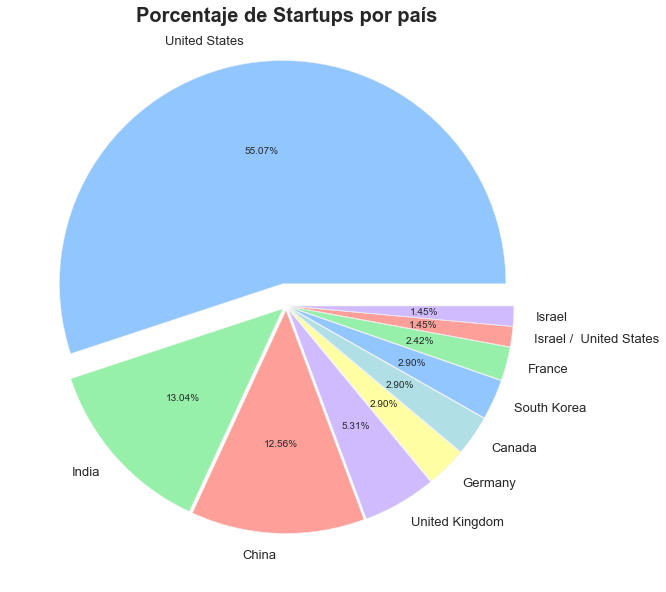

In [411]:
industry_country.plot.pie(x='Country', y='Country',figsize=(10,10), autopct='%.2f%%',  explode=[0.1, 0.02, 0.02,0.02, 0.02, 0.02,0.02, 0.02,0.02,0.02]);

plt.style.use('seaborn-pastel')

plt.title('Porcentaje de Startups por país', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('');
plt.ylabel('');
plt.legend("");


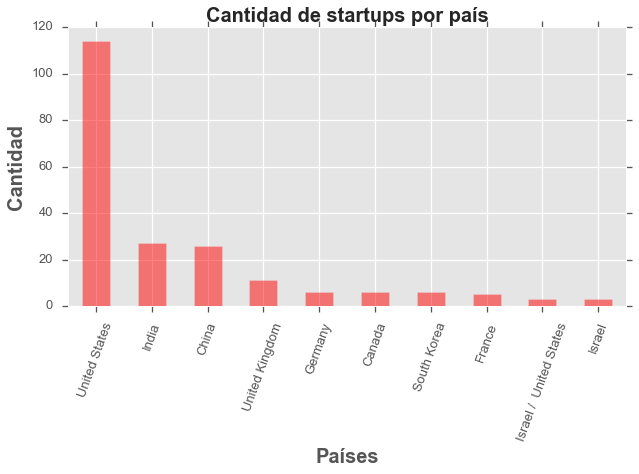

In [412]:
industry_country.plot.bar(figsize=(10,5),color = 'red' , alpha = 0.5);

plt.style.use('seaborn-muted')

plt.title('Cantidad de startups por país', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('Países', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.ylabel('Cantidad', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xticks(rotation=70);

Podemos ver que EEUU lidera ampliamente la tabla en cantidad de Startups con 114, seguido por India con 27 y China con 26.

### 4.2 Valuación total de las Startups por país

In [398]:
#valuación total por país

country_total = clean_df.groupby(['Country'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10).to_frame().reset_index()

country_total


,Country,Valuation_Billions
0,United States,806.17
1,China,315.29
2,India,130.00
3,United States / Ireland,95.00
4,United Kingdom,94.25
5,Sweden,57.35
6,Australia,42.20
7,Brazil,37.00
8,South Korea,35.68
9,Germany,32.10


In [399]:
#Falta graficar esto...

#country_total.plot.barh(x='Country', stacked=True, title='Valuation');

#pie chart?

Como es de esperarse, las empresas Norte Americanas lideran en la valuación total de las Startups por país. Esto puede deberse a la amplia diferencia en las cantidades mencionadas en el apartado anterior ya que poseen el 55% del total de las Startups por país situadas en el top 10 de este análisis. A su vez, China se coloca en el segundo puesto, superando por más del doble a la India, ubicada en el tercer escalón.

### 4.3 Top 10 Startups mayor valuadas

In [400]:
company_name = clean_df.groupby(['Country','Company','Industry_Field'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10).to_frame()

company_name

Valuation_Billions
Country                  Company    Industry_Field                        
China                    ByteDance  Internet                         140.0
United States            SpaceX     Aerospace                        100.0
United States /  Ireland Stripe     Financial services                95.0
Sweden                   Klarna     Fintech                           45.6
Australia                Canva      Graphic design                    40.0
United States            Instacart  Retail                            39.0
                         Databricks Software                          38.0
United Kingdom           Revolut    Fintech                           33.0
United Kingdom /  UAE    Telegram   Internet                          30.0
Brazil                   Nubank     Financial services                30.0

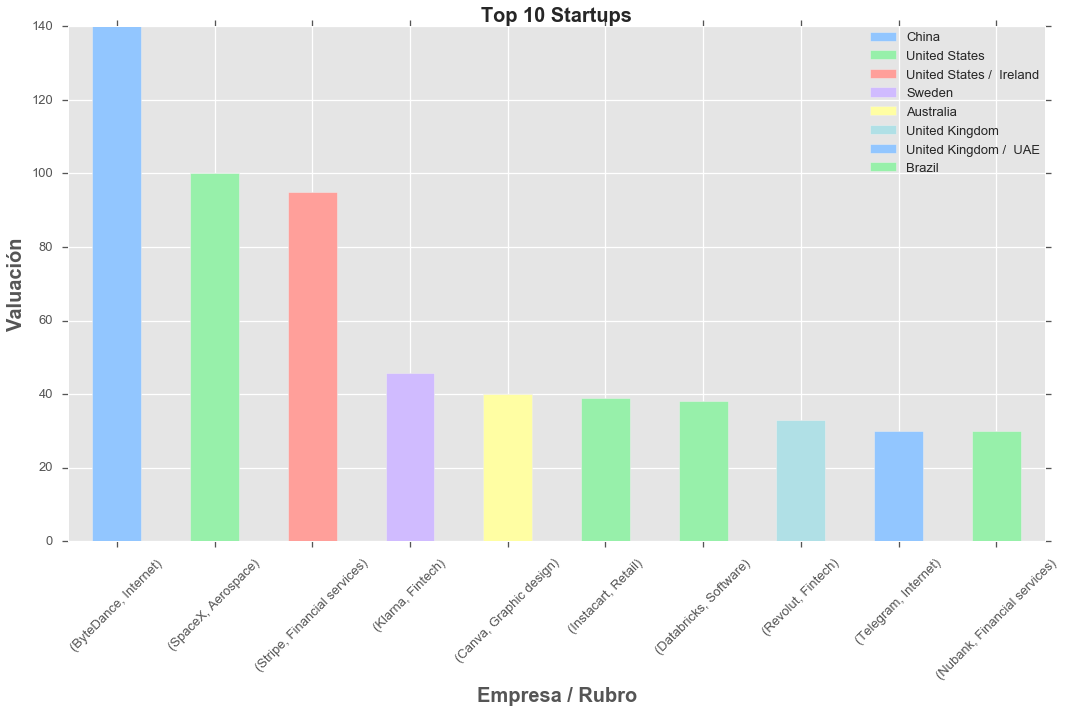

In [402]:
company_name = clean_df.groupby(['Country','Company','Industry_Field'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10).unstack('Country')

company_name.plot(kind='bar', stacked=True, figsize = (15,10))

plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)
plt.style.use('seaborn-pastel')

plt.title("Top 10 Startups", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel("Empresa / Rubro", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.ylabel("Valuación", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.title("Top 10 Startups", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xticks(rotation=45);
plt.tight_layout()

Ahora, cuando vemos aquellas empresas mejor valuadas, encontramos que la empresa China ByteDance lidera la lista con una valuación total de 140 billones de USD, superando a aquella mejor valuada de origen Estadounidense.

### 4.4 ¿Qué país concentra una mayor valuación y qué industria la compone?

In [445]:
country_valuation = clean_df.groupby(['Country','Industry_Field',])['Valuation_Billions'].sum().sort_values(ascending = False).head(10).to_frame()
    
country_valuation

Valuation_Billions
Country                  Industry_Field                        
China                    Internet                        140.00
United States            Software                        128.46
                         Aerospace                       104.20
United States /  Ireland Financial services               95.00
United Kingdom           Fintech                          61.70
United States            E-commerce                       51.59
Sweden                   Fintech                          45.60
United States            Undetermined                     42.15
                         Retail                           42.00
Australia                Graphic design                   40.00

In [446]:
country_valuation = clean_df.groupby(['Country','Industry_Field',])['Valuation_Billions'].sum().sort_values(ascending = False).head(10).unstack('Industry_Field')

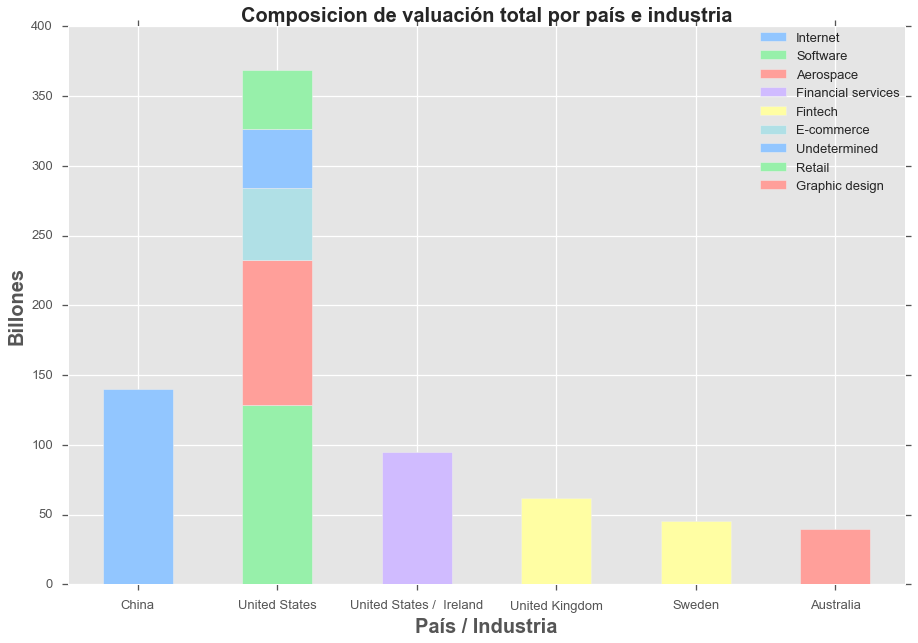

In [447]:
country_valuation.plot(kind='bar', stacked=True, figsize = (15,10))

plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)
plt.style.use('seaborn-pastel')

plt.title('Composicion de valuación total por país e industria', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('País / Industria', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.ylabel('Billones', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xticks(rotation=0);



Se puede observar la variedad en la composición de industrias de la valuación total de las empresas de EEUU. Esto sin duda habla de un entorno sumamente favorable para que empresas de este tipo surjan y predominen en el mundo. 

### 4.5 ¿Que rubro posee una mayor valuación total?

In [417]:
total_valuation = clean_df.groupby(['Industry_Field',])['Valuation_Billions'].sum().sort_values(ascending = False).head(10).to_frame()

total_valuation

,Valuation_Billions
Industry_Field,
Fintech,180.97
Financial services,173.90
Internet,173.00
Software,161.81
E-commerce,125.74
Aerospace,104.20
Cryptocurrency,73.50
Undetermined,61.73
Artificial intelligence,60.53


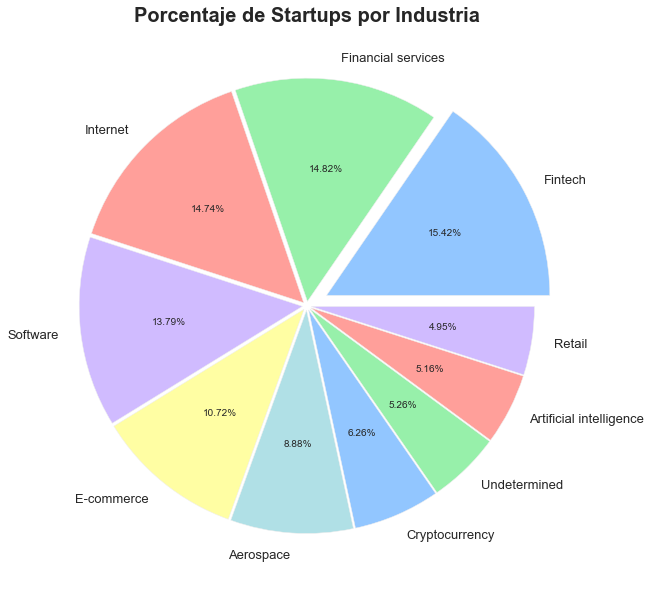

In [420]:
total_valuatiop_plt = total_valuation.plot.pie(x='Industry_Field', y='Valuation_Billions',figsize=(10,10), autopct='%.2f%%',  explode=[0.1, 0.02, 0.02,0.02, 0.02, 0.02,0.02, 0.02,0.02,0.02]);

plt.style.use('seaborn-pastel')

plt.title('Porcentaje de Startups por Industria', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('');
plt.ylabel('');
plt.legend("");

In [419]:
#valuation_df.plot.bar(x='Country', stacked=True, title='Valuation');

Este gráfico nos permite ver qué rubro es el que se encuentra mejor valuado. En este caso, el sector Fintech es el que lidera, seguido muy de cerca por el sector Financial Services, Internet y Software. Esto puede significar que haya mayor cantidad de empresas en este rubro, o que haya empresas mejor valuadas o una combinación de ambas.

En este caso, habría que tener particular precisión a la hora de definir los rubros en los posteriores análisis.

-----------

### 4.6 ¿Qué industria compone las mayores valuaciones por país?

In [182]:
#es necesario dejar esto con el print? o directamente anotarlo en un markdown?

total_valuation =  clean_df['Valuation_Billions'].sum()

print(f"La valuación total de las startups al año 2021 es: {total_valuation} billones de USD")

La valuación total de las startups al año 2021 es: 1955.21 billones de USD


In [183]:
top_valuation =  clean_df['Valuation_Billions'].head(10).sum()

print(f"La valuación del top 10 startups  al año 2021 es: {top_valuation} billones de USD")

La valuación del top 10 startups  al año 2021 es: 590.6 billones de USD


In [184]:
clean_df['Valuation_Percentage'] = round((clean_df['Valuation_Billions']/top_valuation)*100,2)


#clean_df.head(10)

In [185]:
total_percentage = clean_df.groupby(['Country','Industry_Field', 'Valuation_Percentage'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10)

total_percentage.to_frame()

Valuation_Billions
Country                  Industry_Field     Valuation_Percentage                    
China                    Internet           23.70                              140.0
United States            Aerospace          16.93                              100.0
United States /  Ireland Financial services 16.09                               95.0
Sweden                   Fintech            7.72                                45.6
Australia                Graphic design     6.77                                40.0
United States            Retail             6.60                                39.0
                         Software           6.43                                38.0
United Kingdom           Fintech            5.59                                33.0
United Kingdom /  UAE    Internet           5.08                                30.0
Brazil                   Financial services 5.08                                30.0

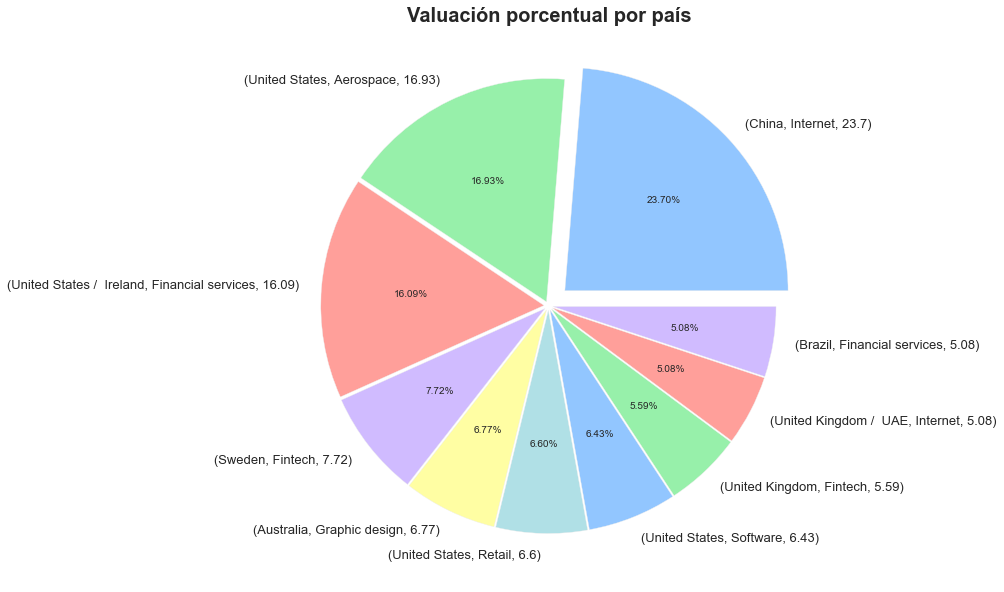

In [272]:
total_percentage_plot = total_percentage.plot.pie(x='Total_Valuation', y='Valuation_Percentage',figsize=(10,10), autopct='%.2f%%',  explode=[0.1, 0.02, 0.02,0.02, 0.02, 0.02,0.02, 0.02,0.02,0.02]);

plt.style.use('seaborn-pastel')

plt.title('Valuación porcentual por país', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('');
plt.ylabel('');


En este gráfico se puede observar como se componen las valuaciones mayores de cada país. La empresa mejor valuada es China y pertenece al rubro Internet. Esta corresponde al 23% de la valuación total de las 10 empresas mejor valuadas, seguida por una empresa Estadounidense del rubro Aerospace.

### 4.7 ¿Que rubro lidera la aparición de Startups en el año 2021?

In [413]:
industry_type = clean_df.Industry_Field.value_counts().head(10).to_frame().reset_index()

industry_type



,index,Industry_Field
0,Fintech,24
1,Software,23
2,Undetermined,17
3,E-commerce,15
4,Artificial intelligence,10
5,Cryptocurrency,9
6,Financial services,9
7,Cybersecurity,8
8,Transportation,6
9,Marketplace,6


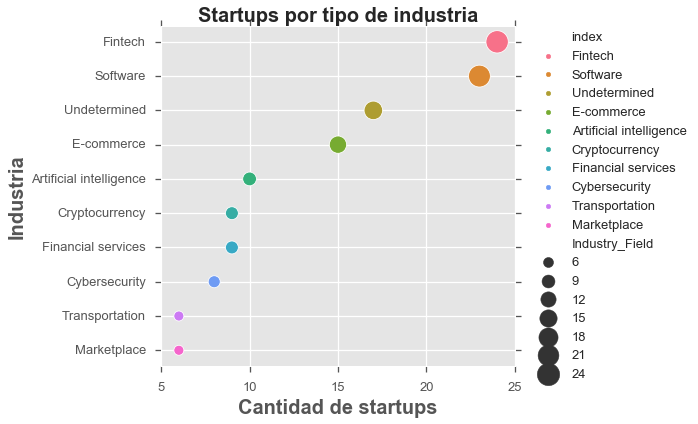

In [414]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Industry_Field", 
                y="index",
                size="Industry_Field",
                sizes=(100,500),
                hue = 'index',
                data=new_df)

plt.legend(bbox_to_anchor=(1.5, 1),borderaxespad=0)
plt.xlabel("Cantidad de startups", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.ylabel("Industria", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.title("Startups por tipo de industria", fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.tight_layout()

Como planteamos anteriormente, el rubro Fintech lidera la cantidad de Startups al año 2021. Esto significa que el rubro que más ha desarrollado startups en el año pasado, corresponde al sector Fintech, seguido por empresas del sector Software y por empresas cuyo rubro no pudo determinarse.

## 5. Conclusiones

#### Llegando al final del análisis, podemos establecer algunos hallazgos que han surgido a través del mismo.

1. EEUU lidera ampliamente la tabla en cantidad de Startups con 114, seguido por India con 27 y China con 26.

2. Las empresas Norteamericanas lideran en la valuación total de las Startups por país. Esto puede deberse a la amplia diferencia en las cantidades mencionadas en el apartado anterior ya que poseen el 55% del total de las Startups por país situadas en el top 10 de este análisis. A su vez, China se coloca en el segundo puesto, superando por más del doble a la India, ubicada en el tercer escalón.

3. Cuando vemos aquellas empresas mejor valuadas, encontramos que la empresa China ByteDance lidera la lista con una valuación total de 140 billones de USD, superando a aquella mejor valuada de origen Estadounidense, SpaceX.

4. La variedad en la composición de industrias de la valuación total de las empresas de EEUU. Esto puede deberse a un entorno sumamente favorable para el desarrollo y subsistencia de este tipo de empresas.

5. El sector Fintech es el que lidera las empresas mejor valuadas, seguido muy de cerca por el sector Financial Services, Internet y Software. Esto puede significar que haya mayor cantidad de empresas en este rubro, o que haya empresas mejor valuadas o una combinación de ambos escenarios.

6. La empresa mejor valuada es China y pertenece al rubro Internet. Esta corresponde al 23% de la valuación total de las 10 empresas mejor valuadas, seguida por una empresa Estadounidense del rubro Aerospace. 

7. El rubro Fintech lidera la cantidad de Startups al año 2021. Esto significa que el rubro que más ha desarrollado startups en el año pasado, corresponde al sector Fintech, seguido por empresas del sector Software y por empresas cuyo rubro no pudo determinarse. Esto puede resultar interesante para profundizar la investigación, ya que poseemos un gran número de empresas cuyo rubro no pudo determinarse. En este caso, habría que tener particular precisión a la hora de definir los rubros en los posteriores análisis.

### ¿Cómo profundizar el análisis?

#### Para esto debemos tener en cuenta diversos elementos.

1. En primer lugar, trabajar con un Dataset acotado a un año, limita las posibilidades de análisis de la evolución de estos sectores y empresas. Sería interesante poseer un Dataset con los datos de estas empresas para diversos años.

2. Sería interesante poder graficar en un mapa la distribución del surgimiento de estas empresas.

4. Profundizar el análisis relativo a las causas que favorecen la aparición de estas empresas y los efectos que producen en las economías y en el desarrollo de los mismos.

## 6. Referencias